# Starting Out
### Objective of the project
The objective of this project is to accurately predict if an individual has breast cancer or not, by training a logistic regression model with the data, "breast_cancer_data.csv".


### Understanding the data set

When starting out in any project, always look through the data set and understand what it entails. This will help to identify the features, attributes, and also give you a good understanding of which data is useful and which is not. 

To do so, you can use data.head() to get the first 5 rows within the data set. But an even better way would be to open the csv file directly and have a look.

From the head(), you can tell that the attribute is the “diagnosis” column, where M is malignant and B is benign. Also, i know that there are 32 features (from the head()), including the “id”.

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bc_data = pd.read_csv('breast_cancer_data.csv')
len(bc_data)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Bar graph

Now, to plot a simple bar graph that displays the categorical data, you can use “sns.counplot(x = ‘diagnosis’, data = bc_data)”

This will produce a bar graph that visually shows the total amount of M and Bs in the “diagnosis” column. This is useful to verify if the data is skewed towards only 1 attribute. Form the countplot, there is a considerably higher number of Benign values (357) as compared to the Malignant values (212). This skewness might cause the model to be inaccurate.

 However, this can be solved by taking the weighted values during the classification report.

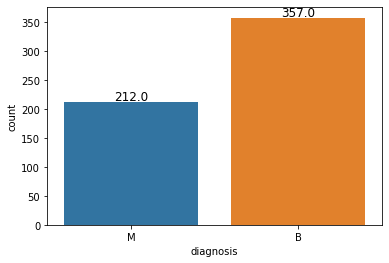

In [3]:
ax = sns.countplot(x='diagnosis', data=bc_data)

# Calculate and add text labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


### Heatmap

Checking for missing values easily, a heat map can be used. “sns.heatmap(bc_data.isna())” will show a heat map and also the missing values if there are any. There, the engineer can decide to use the features or not, if there are too many missing features. But as for what percentage of loss features should be considered before dropping, it really just depends. ChatGPT recommends 70-80%. But if it is less, imputation can be used. (Deserves its own page)

<AxesSubplot: >

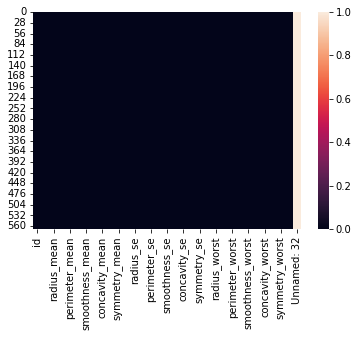

In [4]:
sns.heatmap(bc_data.isna())

### Removing features based on correlation

If a feature has little to no correlation or predictive power for the task you're working on, it might be a good idea to remove it. Irrelevant features can introduce noise and potentially hinder the performance of your model.

To do so, the categorical feature of 'diagnosis' has to be converted into a numerical format. The code below will turn "M" into 1 and the rest (which is only "B") to 0. Correlation Analysis can then be done.

In [5]:
bc_data['diagnosis'] = (bc_data['diagnosis'] == 'M').astype(int)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analysing the Correlation table

Based on the Correlation Table, there are several features that have little to no correlation to the attribute. Hence, they are removed. To err on the safe side, only the features are less than 0.02 are removed.

Removing them will reduce the dimensionality of the dataset, leading to faster training times and help to avoid overfitting as well. Moreover, it can potentially help to reduce noise which will hinder the performance of the model.

<AxesSubplot: >

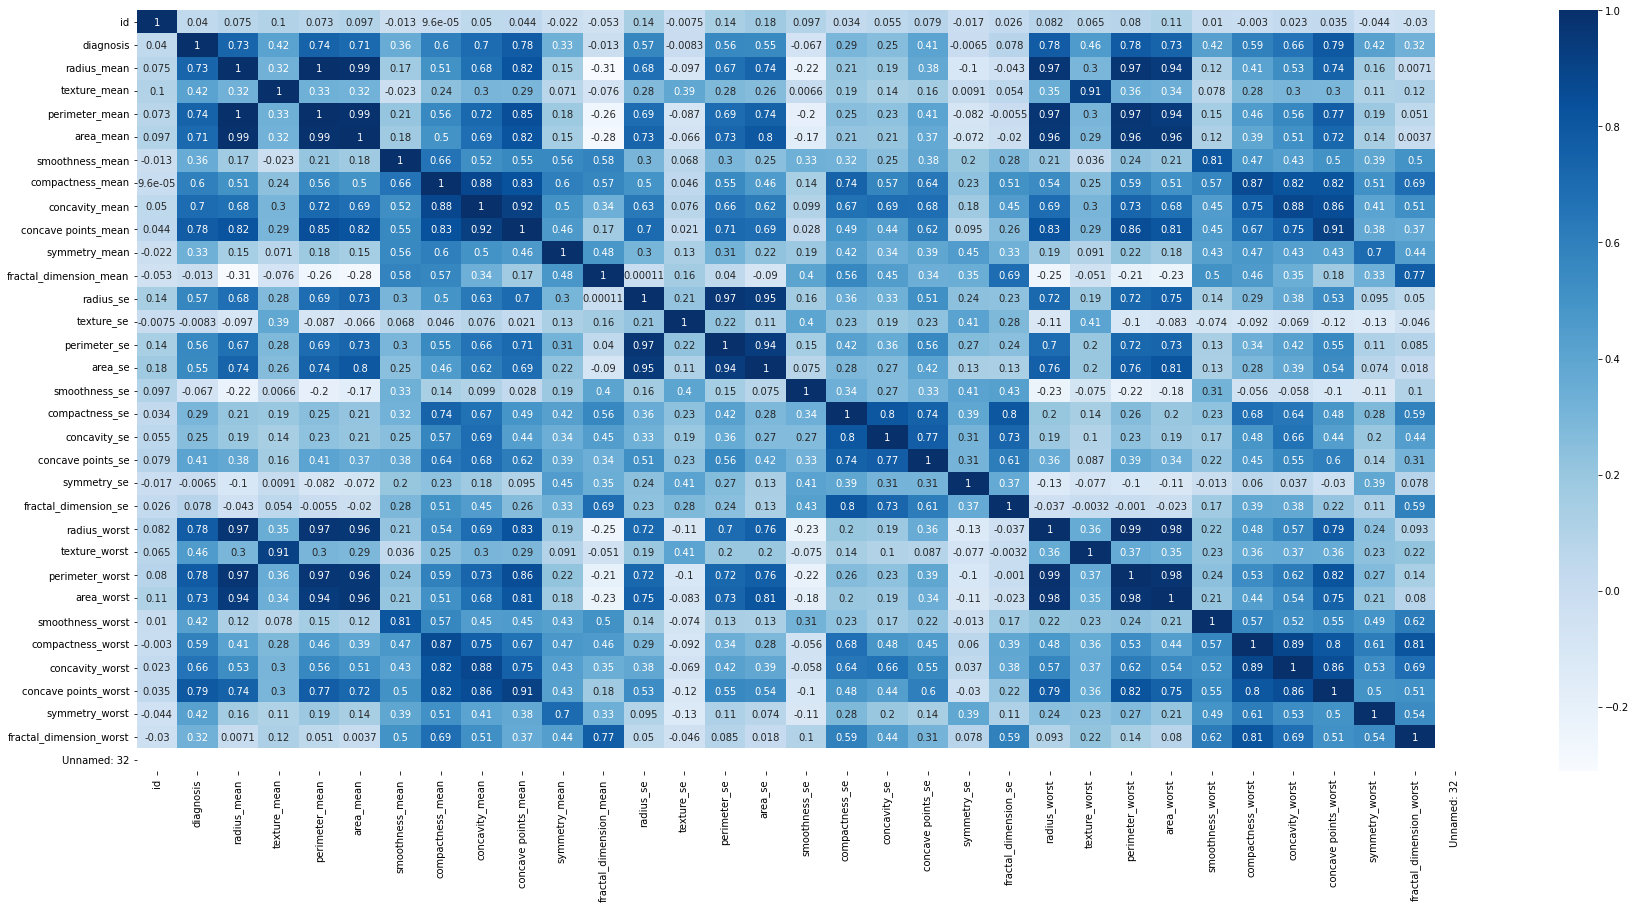

In [6]:
plt.figure(figsize=(30,14))
sns.heatmap(bc_data.corr(),annot=True,cmap='Blues')

In [7]:
bc_data.drop(['Unnamed: 32', 'id','symmetry_se','texture_se','fractal_dimension_mean'], axis = 1, inplace = True)
bc_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Common Method of Modeling
Use train_test_split to split the raw data into 4 DataFrames, as seen in the code. The test_size indicates what percentage of the dataset will be used as the test, while the rest will remain as the training DataFrame. The random_state functions as a seed.

In [8]:
from sklearn.model_selection import train_test_split

features = bc_data['diagnosis']
attributes = bc_data.drop(['diagnosis'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(attributes, features, test_size=0.33, random_state=42)


# Training the Model and using it to predict

Follow the steps below and use those libraries to train the Logistic Regression Model and then finally utilize it to predict the attribute.
"pd.DataFrame(confusion_matrix..." prints a table that helps you evaluate the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



lr = LogisticRegression()

lr.fit(x_train,y_train)

predict = lr.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

c:\Users\nicho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted No,Predicted Yes
Actual No,118,3
Actual Yes,3,64


# Classification Report

Classification Report is a useful tool to indicate how accurate or precise the trained model is. Depending on how the data is cleaned, along with newly engineered features, it may or may not imprvoe the model. Take note of it.


The return of this function will be a macro average ( averaging the unweighted mean per label), weighted average (averaging the support-wegihted mean per label) and sample average (only for multilabel classification).


## Need to know before continuing
True Positive (TP): Number of instances that were correctly predicted as positive by the model.

False Positive (FP): Number of instances that were incorrectly predicted as positive by the model, when they were actually negative. (Better for medical diagnosis)


True Negative (TN): Number of instances that were correctly predicted as negative by the model.

False Negatives (FN): Number of instance that were incorrectly predicted as negative by the model, when they were actually positive.

### Precision
Precision is used to evaluate the performance of the model. It measures the accuracy of the positive predictions made by the model. It answers the question,
"Out of all the positive predictions made by the model, how many are actually correct?"

Precision = True Positives / (True Positive + False Positives)

High precision means that the model is very good at identifying postiive instances and doesnt make many false positive errors.


### Recall / Sensitivity / True Positive Rate
Recall is used to evaluate the performance of the model, especially in a binary classification problem.
It measures the ability of the model to correctly identify all the relevant/postivie instances in the dataset.
It answers the question,
"Out of all the actual postive instances, how many were correctly predicted as positive by the model?"
A high recall would mean that the model is good at identifying most of the actual positive instance, reducing the chance of false negatives. (Failing to identify true positives)

Recall = True Positives/ (True Positives + False Negatives)


## F1-Score
F1-Score is used to evaluate the performance of a classification model, especially in situations where there is an imbalance between the classes or when you want to balance the trade-off between precision and recall.
It is the harmonic mean of precision and recall, and it provides a single, balanced measure of a model's performance.

F1-Score = (2 * Precision * Recall) / (Precision + Recall)

F1-Score ranges from 0 to 1, with higher values indicating better model performance. The harmonic mean is used since it penalizes extreme valeus. Hence, F1-score tends to be high only if both precision and recall are high.

F1-Score is a measure of a model's accuracy that considers both False Positives and False Negatives, providing a balanced assessment of classification model performance



In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict, digits = 3))

              precision    recall  f1-score   support

           0      0.975     0.975     0.975       121
           1      0.955     0.955     0.955        67

    accuracy                          0.968       188
   macro avg      0.965     0.965     0.965       188
weighted avg      0.968     0.968     0.968       188



# Conclusion, Model Analysis

 In this context, the priority is placed on minimizing the number of false negatives, as the potential consequences of missing a true positive case are considerably more significant than the implications of false positives. Moreover, since there is a considerable difference in the number of malignant and benign values, the weighted average will be taken. 
 
 Therefore, the model that has a weighted average recall value of 0.968, which is evident that the logistic regression model performs effectively in predicting whether an individual has breast cancer or not.



# Building my own Logistic Regression Code with Stochastic Gradient Descent
In my journey to explore machine learning, I took the initiative to craft my own logistic regression model from scratch. My custom implementation leverages stochastic gradient descent (SGD) as the optimization technique to fine-tune the model's weights. With a maximum iteration set at 20,000, this parameter can be easily adjusted to suit the task at hand.

One notable accomplishment I've achieved with my custom logistic regression model is an exceptionally high weighted average recall score of 0.973, which is higher than the recall achieved by the logistic regression model provided by the scikit-learn package.

In [11]:
import numpy as np
# Note that this will only work if y is either -1 or 1, and not 1 and 0.


def sigmoid(z):
    return 1/(1 + np.exp(-z))


# sgd refers to stochastic gradient descent!

def sgd_LG(features, labels, learning_rate=0.05, max_iterations=20000):
    features_rows, features_columns = features.shape
    weight = np.zeros(features_columns)
    offset = 0

    labels = labels.astype(float)
    

    for _ in range(max_iterations):        
        # Randomly select a data point
        rand = np.random.randint(features_rows)
        x_i,y_i = features[rand],labels[rand]

        # Calculate prediction
        s = (np.dot(weight, x_i) + offset)
        #prob = sigmoid(s)
        
        # Update the weight
        gradient = (-y_i * x_i) / (1 + np.exp(y_i * s))
        
        
        # Update the offset
        gradient_offset = -y_i / (1 + np.exp(y_i * s))
        
        weight -= learning_rate * gradient
        offset -= learning_rate * gradient_offset
        # Check for convergence based on a tolerance level
        # if np.all(np.abs(prev_weight - weight) < tolerance) and abs(prev_offset - offset) < tolerance:
        #     break

    return weight, offset

def log_pred(weight, offset, test_features):
    predictions = []
    for i in range(len(test_features)):
        # Access the i-th row of the DataFrame
        row = test_features.iloc[i]
        s = np.dot(weight, row) + offset
        prob = sigmoid(s)
        if prob > 0.5:
            predictions.append(1)
        else:
            predictions.append(-1)
    return predictions

In [12]:
#import sys
#sys.path.insert(1,'C:\\Users\\nicho\\Documents\\GitHub\\MachineLearningProjects\\ML_Models')

#from ML_Models.LogisticRegression import sgd_LG

label = bc_data['diagnosis']
label = label.replace(0, -1).values


features = bc_data.drop(['diagnosis'],axis = 1)
features = (features -np.min(features))/(np.max(features)-np.min(features))
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

x_train = x_train.values
weight,offset = sgd_LG(x_train,y_train)

pred_labels = log_pred(weight,offset, x_test)
pred_labels_array = np.array(pred_labels)
pred_labels_array = pred_labels_array.astype(y_test.dtype)
pred_labels_array
pd.DataFrame(confusion_matrix(y_test, pred_labels_array), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

c:\Users\nicho\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\nicho\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Predicted No,Predicted Yes
Actual No,118,3
Actual Yes,2,65


In [13]:
print(classification_report(y_test, pred_labels_array, digits = 3))

              precision    recall  f1-score   support

          -1      0.983     0.975     0.979       121
           1      0.956     0.970     0.963        67

    accuracy                          0.973       188
   macro avg      0.970     0.973     0.971       188
weighted avg      0.974     0.973     0.973       188

